# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longuyon
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | st. john's
Processing Record 4 of Set 1 | yamada
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | panadura
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | bajina basta
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | yallahs
Processing Record 12 of Set 1 | aberdeen
Processing Record 13 of Set 1 | torghay
Processing Record 14 of Set 1 | sisimiut
Processing Record 15 of Set 1 | yuzhno-kurilsk
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | jatibonico
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | kingston
Processing Record 22 of Set 1 | kisangani
Proces

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longuyon,49.4455,5.6015,8.32,80,100,1.92,FR,1741486931
1,port-aux-francais,-49.3500,70.2167,4.84,72,21,16.39,TF,1741486932
2,st. john's,47.5649,-52.7093,-0.02,76,20,7.20,CA,1741486847
3,yamada,39.4667,141.9500,5.63,42,97,2.30,JP,1741486934
4,iskateley,67.6803,53.1512,-15.83,96,17,4.51,RU,1741486936


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longuyon,49.4455,5.6015,8.32,80,100,1.92,FR,1741486931
1,port-aux-francais,-49.3500,70.2167,4.84,72,21,16.39,TF,1741486932
2,st. john's,47.5649,-52.7093,-0.02,76,20,7.20,CA,1741486847
3,yamada,39.4667,141.9500,5.63,42,97,2.30,JP,1741486934
4,iskateley,67.6803,53.1512,-15.83,96,17,4.51,RU,1741486936


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

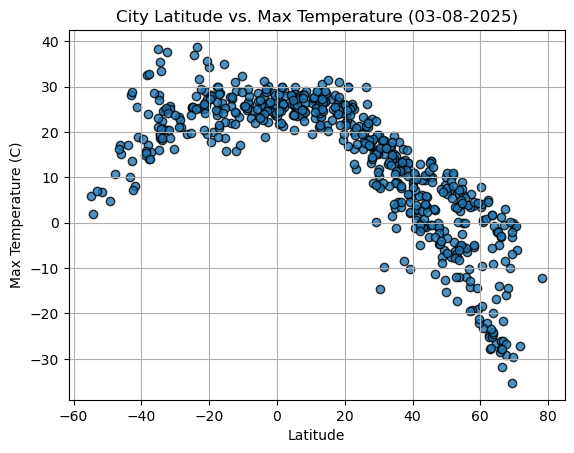

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03-08-2025)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

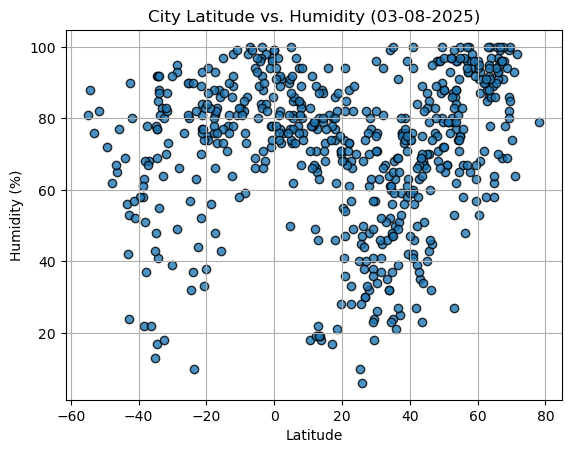

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03-08-2025)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

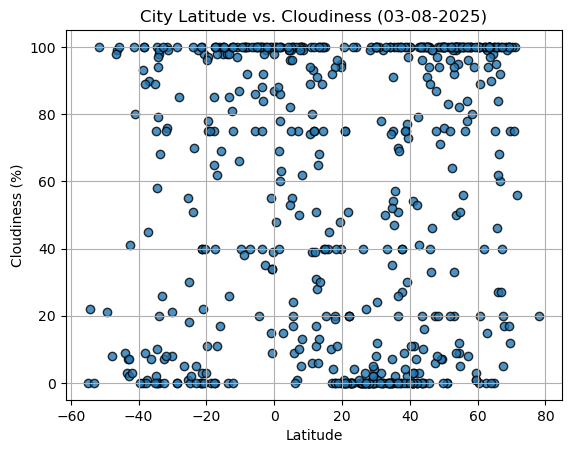

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03-08-2025)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

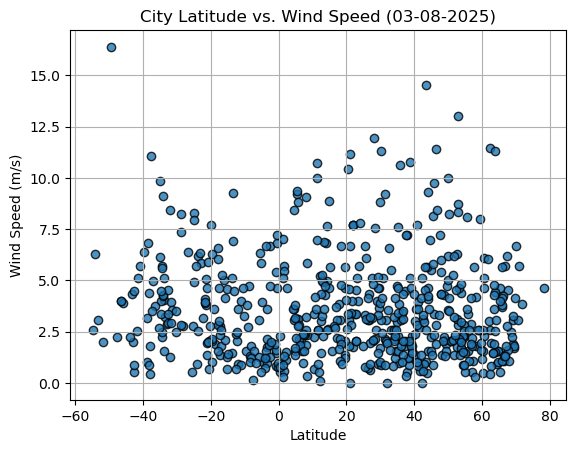

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03-08-2025)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [207]:
# Define a function to create Linear Regression plots
#def lin_reg(x_values, y_values, compare_value, xy):
def lin_reg(hemi, y_variable, xy):
    if hemi == "N":
        x_values = northern_hemi_df["Lat"]
        y_values = northern_hemi_df[y_variable]
    else:
        x_values = southern_hemi_df["Lat"]
        y_values = southern_hemi_df[y_variable]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,xy=xy,fontsize=15,color="red")
    plt.title(f"Latitude vs {y_variable}")
    plt.xlabel("Latitude")
    plt.ylabel(y_variable)
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longuyon,49.4455,5.6015,8.32,80,100,1.92,FR,1741486931
2,st. john's,47.5649,-52.7093,-0.02,76,20,7.20,CA,1741486847
3,yamada,39.4667,141.9500,5.63,42,97,2.30,JP,1741486934
4,iskateley,67.6803,53.1512,-15.83,96,17,4.51,RU,1741486936
5,panadura,6.7132,79.9026,23.90,85,1,2.05,LK,1741486750


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.84,72,21,16.39,TF,1741486932
6,invercargill,-46.4000,168.3500,17.23,65,99,4.02,NZ,1741486938
7,adamstown,-25.0660,-130.1015,25.34,80,18,8.31,PN,1741486939
9,puerto natales,-51.7236,-72.4875,6.82,82,100,2.01,CL,1741486941
15,blackmans bay,-43.0167,147.3167,28.07,42,7,1.98,AU,1741486948


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7531505065791525


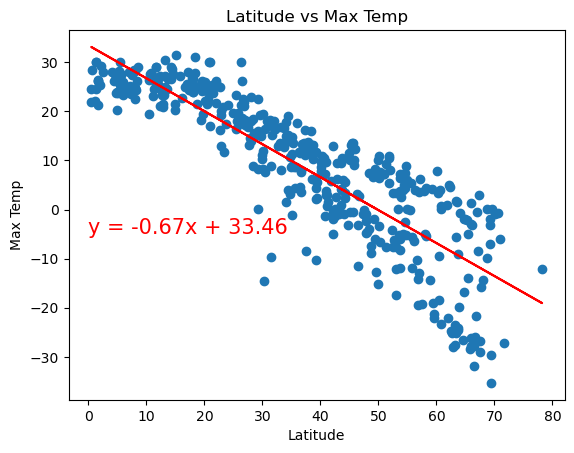

In [239]:
# Linear regression on Northern Hemisphere
lin_reg("N", "Max Temp", (0,-5))

The r^2-value is: 0.23300483160105231


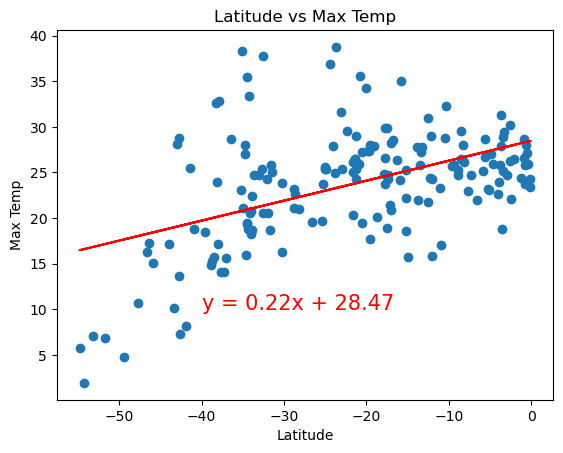

In [243]:
# Linear regression on Southern Hemisphere
lin_reg("S", "Max Temp", (-40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.05456168455196611


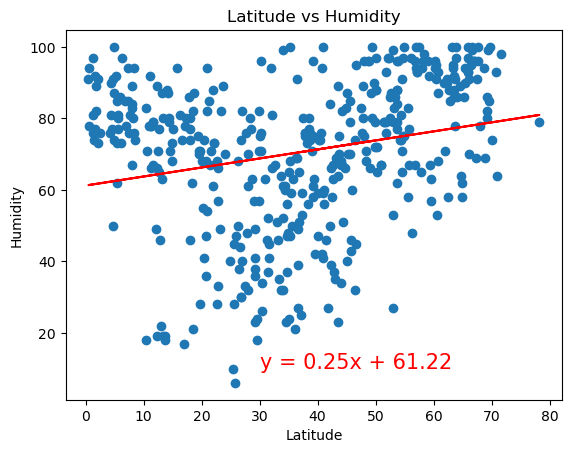

In [233]:
# Northern Hemisphere
lin_reg("N", "Humidity", (30,10))

The r^2-value is: 0.16102132012543766


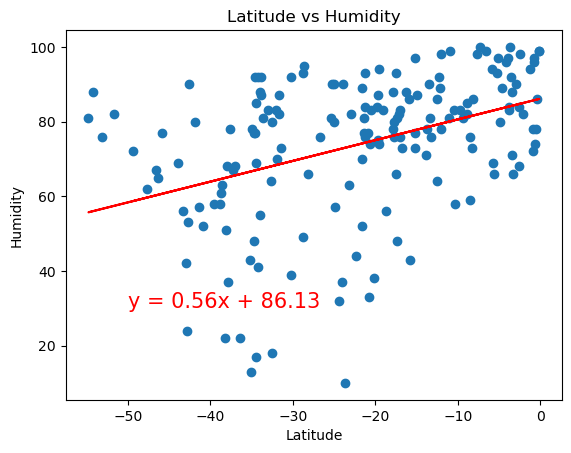

In [227]:
# Southern Hemisphere
lin_reg("S", "Humidity", (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.029923810850654268


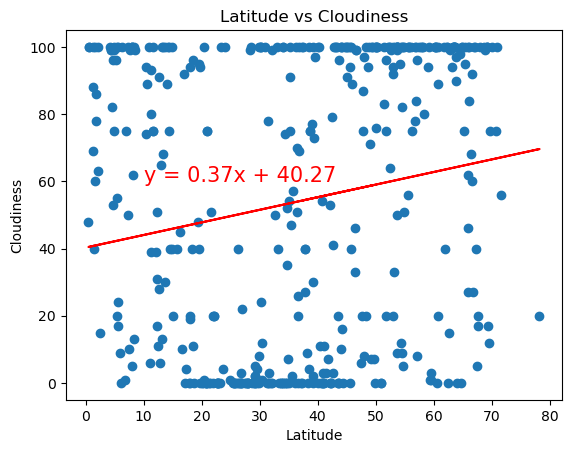

In [223]:
# Northern Hemisphere
lin_reg("N", "Cloudiness", (10,60))

The r^2-value is: 0.11016199888196289


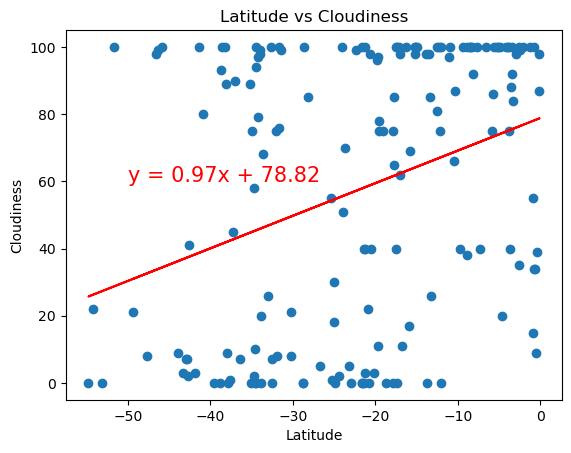

In [219]:
# Southern Hemisphere
lin_reg("S", "Cloudiness", (-50,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.002356682500447419


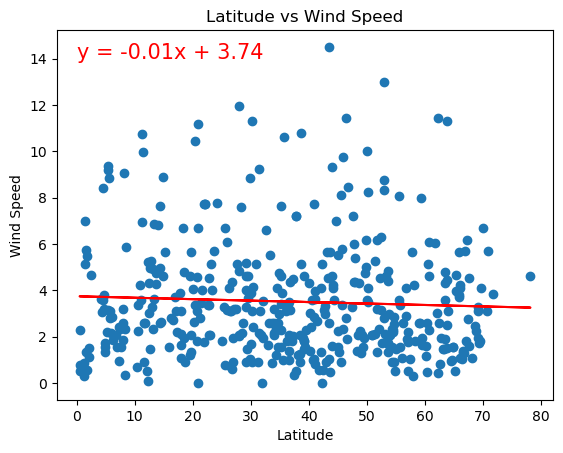

In [209]:
# Northern Hemisphere
lin_reg("N", "Wind Speed", (0,14))

The r^2-value is: 0.05673969272222824


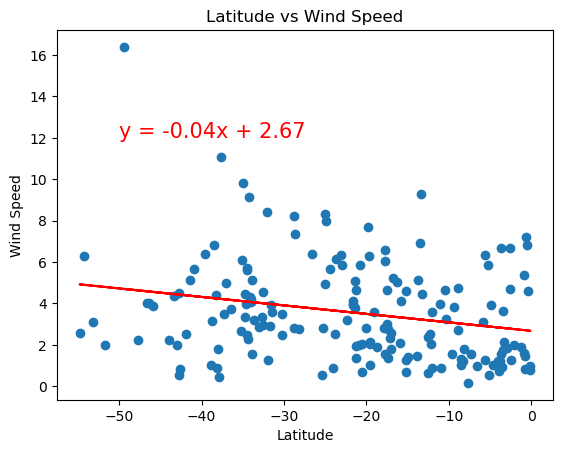

In [211]:
# Southern Hemisphere
lin_reg("S", "Wind Speed", (-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE